*DAIA - Week 6 exercise*

# Time Series visualization

Import the necessary packages. We work primarily with pandas, but we will use seaborn for plotting where possible. As Seaborn and the pandas plotting facilities depend on matplotlib, we import matplotlib's interactive plotting API (pyplot) as well. In addition we set Seaborn's appearance defaults as our Notebook defaults.

In your own notebook(s) this topic and these actions (most likely) are part of your __Data Understanding__ section.

In [360]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme() # use seaborn default settings

Read the data. The csv is semicolon separated and we have to do some transformations on the date field which is in Dutch format as well.

After having read the csv file a couple of times, we know what we want to do upon initial reading:
1. set the separator value to ';' (instead of the default ','
2. set the decimal indicator to ',' (instead of the default '.')
3. skip first rows (how many?).
4. parse the second column (orderdate) as a date in dayfirst format

If you do not know how to set these parameters, check https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
Lastly, as you probably have noticed, there are several columns with categorical data. You can use the 'dtype' parameter and set it to a list with the correct types.


5. set all the nominal value columns to category type, using the dict below, containing key-value pairs for the specified columns: 



In [361]:
dtypes = {
   "orderno":    'category',
   "orderdate":  'string',
#                ^ read_csv can only read int, float or string types
   "empno":      'category',
   "name":       'string',
   "custno":     'int',
   "city":       'category',
   "regioncode": 'category',
   "prodno":     'category',
   "proddesc":   'string',
   "catdesc":    'string',
   "quantity":   'int',
   "linetotal":  'float'
}


# Read the sales.csv dataset, using the parameters mentioned above. Don't forget to add you explanation in comments.
dmyParser = lambda x: pd.to_datetime(x).strftime('%d/%m/%Y')
#           ^ Custom lambda function to read string as d/m/Y dateTime

# from datetime import datetime
# dmyParser = lambda x: datetime.strptime(x, "%d/%m/%Y")
#             ^ Also valid lambda function but datetime will be deprecated

df = pd.read_csv('sales-1.csv', sep=';', decimal=',', header=17, dtype=dtypes, parse_dates=['orderdate'], date_parser=dmyParser)
#    Relative file path^              ^  ^Specify Decimal  ^     ^Specify col types  ^Specify date cols   ^Custom date parser
#                    Specify seperator^                    ^Row containing headers
# 
# skiprows param could also be used instead of specifying the header

# check if dtypes have been changed correctly
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   orderno     530 non-null    category      
 1   orderdate   530 non-null    datetime64[ns]
 2   empno       530 non-null    category      
 3   name        530 non-null    string        
 4   custno      530 non-null    int32         
 5   city        530 non-null    category      
 6   regioncode  530 non-null    category      
 7   prodno      530 non-null    category      
 8   proddesc    530 non-null    string        
 9   catdesc     530 non-null    string        
 10  quantity    530 non-null    int32         
 11  linetotal   530 non-null    float64       
dtypes: category(5), datetime64[ns](1), float64(1), int32(2), string(3)
memory usage: 48.5 KB


,orderno,orderdate,empno,name,custno,city,regioncode,prodno,proddesc,catdesc,quantity,linetotal
0,1001,2017-01-06,805,Harrie,15,Veghel,GVGH,408,Fruit Yogurt Mango,Dairy Products,9,146.25
1,1004,2017-01-14,806,Karel,19,Veghel,GVGH,406,Foie Gras,Luxury Products,7,52.50
2,1014,2017-01-27,806,Karel,19,Veghel,GVGH,401,Organic Soymilk Sweetened,Organic Products,22,473.00
3,1014,2017-01-27,806,Karel,19,Veghel,GVGH,405,Sweetbread,Luxury Products,9,80.55
4,1014,2017-01-27,806,Karel,19,Veghel,GVGH,409,Low-Fat Quark,Dairy Products,23,373.75


Check if the data has been read correctly. As the data is about sales transaction, can you figure out what the index (unique identifier) for a transaction is?

In [362]:
# see if Orderno (order number) is a unique identifier (obviously not, as several numbers have a count > 1.)
print('Unique:', df['orderno'].is_unique)

Unique: False


Calculate and show the total per order (so sum the linetotal for each order). Make sure you handle double order numbers correctly and check your results.

In [363]:
# Your code and comments below:
dfs = pd.DataFrame(columns=['orderno', 'totalsum'])
dfs['orderno'] = df['orderno'].unique()

def getOrderNoSum(x):
    return df[df['orderno'] == x]['linetotal'].sum()

# %timeit and %time can be used to profile execution time inside of cells
# Performance difference with such a small function is negligible

# Using apply with either custom func or lambda expression
# dfs['totalsum'] = dfs['orderno'].apply(getOrderNoSum)
dfs['totalsum'] = dfs['orderno'].apply(lambda x: df[df['orderno'] == x]['linetotal'].sum())

dfs.head()

,orderno,totalsum
0,1001,146.25
1,1004,52.50
2,1014,927.30
3,1016,97.50
4,1017,332.30


custom func  
  
  
custom lambda  


What is the trend in monthly order volume over the years? Show this in a plot.

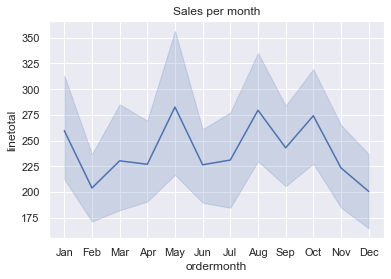

In [364]:
# Your code and comments....
# Also explain the chosen axes and graph type.

# df.plot(x='orderdate', y='linetotal')
# ^Unreadable

# Set the specific month and year of each sale
# Setting year and day aswell for future use possibly
df['ordermonth'] = df['orderdate'].dt.month
df['orderyear'] = df['orderdate'].dt.year
df['orderday'] = df['orderdate'].dt.day
pt = sns.lineplot(data=df, x='ordermonth', y='linetotal')

# Set the xticks to be more readable
pt.set_xticks(range(1, 13));
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
pt.set_xticklabels(months);
#                         ^Adding semicolon makes it not return it's value into the output

pt.set_title('Sales per month');

There seems to be a sale spike during May with smaller increases around January, August and October

Plotting all values of the entire dataset might hide some details... Can you show what happens with days without sales and days with multiple sales? hint: Zoom in on January 2017... Just show the results in a (short) table, looking at the values before visualizing.

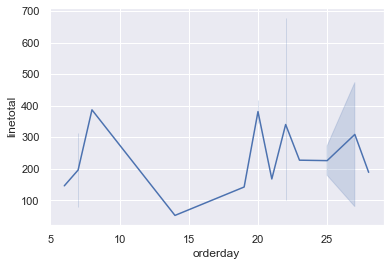

In [365]:
# df.head()

pt = sns.lineplot(data=df[(df['orderyear'] == 2017) & (df['ordermonth'] == 1)], x='orderday', y='linetotal')
# df[(df['orderyear'] == 2017) & (df['ordermonth'] == 1)].sort_values('orderday').tail(10)

Because there are for example no sales for the first couple days of the month, there is no line there at all.  
Later in the month however if there is a period with no data there will just be the connected line between the nearest datapoints.  
  
Also for days with multiple sales a range will be displayed.

In order to be able to use a lot of time-related functionality in Pandas, you should create an index based on the time component. You can use the DataFrame.set_index() function in Pandas (see: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html?highlight=dataframe%20set_index#pandas.DataFrame.set_index).


This, for instance, allows you to slice (or filter) using the index. Make sure you also use the sort_index() function, as the index is not automatically sorted after re-assignin it.

Create a plot of the data from January 2017 (you can use: loc('2017-01') if you have set the index to the orderdate properly).

In [366]:
# You code and comments here... also explain what you see in your plot.
df = df.set_index('orderdate', drop=False).sort_index()
df.loc['2017-01'].tail()
#     ^-->      ^Use brackets not parantheses as said in text above
# pt = sns.lineplot(data=df.loc['2017-01'], x='orderday', y='linetotal')
# Cannot plot because the index contains duplicate values (e.g. there are multiple rows with the same orderdate and thus now the same index)

,orderno,orderdate,empno,name,custno,city,regioncode,prodno,proddesc,catdesc,quantity,linetotal,ordermonth,orderyear,orderday
orderdate,,,,,,,,,,,,,,,
2017-01-25,1012,2017-01-25,806,Karel,13,Helmond,RHMD,402,Organic Soy Custard,Organic Products,7,272.65,1,2017,25
2017-01-27,1014,2017-01-27,806,Karel,19,Veghel,GVGH,405,Sweetbread,Luxury Products,9,80.55,1,2017,27
2017-01-27,1014,2017-01-27,806,Karel,19,Veghel,GVGH,401,Organic Soymilk Sweetened,Organic Products,22,473.00,1,2017,27
2017-01-27,1014,2017-01-27,806,Karel,19,Veghel,GVGH,409,Low-Fat Quark,Dairy Products,23,373.75,1,2017,27
2017-01-28,1015,2017-01-28,803,Gerda,11,Eindhoven,REHV,410,Full Yogurt,Dairy Products,9,189.00,1,2017,28


To correct the errors is the previous graph, you can use the resample() method. First you need to create a correct index, you can use this code:

fullIndex = pd.DatetimeIndex(pd.date_range('#fill in the range#'))

Then, this DatetimeIndex can  be assigned to the orders dataset, using resample(). Hint: use the fillna() function to assign a zero (0) value to dates that have no value in the orders dataset.

Finally, plot the order values in January 2017 again. Explain the differences.


In [367]:
# your code and comments to resample the data...
fullIndex = pd.DatetimeIndex(pd.date_range(start=df['orderdate'].min(), end=df['orderdate'].max()))
dfrd = df.loc['2017-01'].resample(fullIndex.freq).sum().fillna(0)
# Resampling creates an even distribution of the index, so for this example using a frequency of per day (upsampling)
# Days with the same index will be summed, this will remove all none number columns
dfr.head(10)

,custno,quantity,linetotal,ordermonth,orderyear,orderday
orderdate,,,,,,
2017-01-06,15,9,146.25,1,2017,6
2017-01-07,32,21,392.70,2,4034,14
2017-01-08,13,18,387.00,1,2017,8
2017-01-09,0,0,0.00,0,0,0
2017-01-10,0,0,0.00,0,0,0
2017-01-11,0,0,0.00,0,0,0
2017-01-12,0,0,0.00,0,0,0
2017-01-13,0,0,0.00,0,0,0
2017-01-14,19,7,52.50,1,2017,14


This is actually quite interesting: a lot of things happen at the same time. First, days are created in the date index for all days in the period of registration, even if there where no sales on some of those dates. Note that the period of registration stretches from 2017-01-01 to 2019-12-31. Next, order values on the same day are summed and days without sales get a total order value of 0. Finally, the resulting series is sliced for January 2017 only.

Note I used the min and max for orderdate so my index is more precise within the registration period.

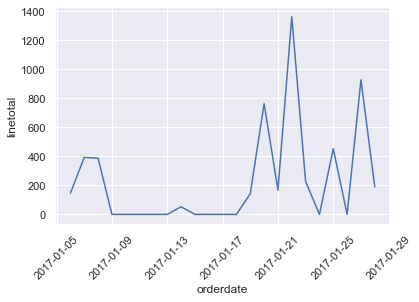

In [377]:
# your code and comments to visualize the resampled data
pt = sns.lineplot(data=dfrd, x=dfrd.index, y='linetotal')
plt.xticks(
    rotation=45  
);

As it it difficult to see a trend in this data, sampling it down to a monthly level would be the smart thing to do. Use the resample function the plot the data on a monthly basis, using sum() to calculate sum of the order values in each month.

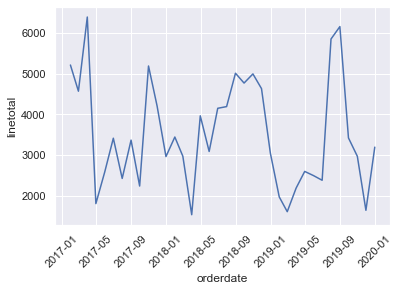

In [378]:
# your code and comments to visualize the resampled data at a monthly basis
dfrm = df.resample('M').sum().fillna(0)
dfrm.head()
pt = sns.lineplot(data=dfrm, x=dfrm.index, y='linetotal')
plt.xticks(
    rotation=45  
);

If we want to know if there is any seasonality involved in order volume, we may want to compare the order volumes year by year. Below you see an example how to plot the order values per year and per month, using the groupby() function.

<AxesSubplot:xlabel='orderdate'>

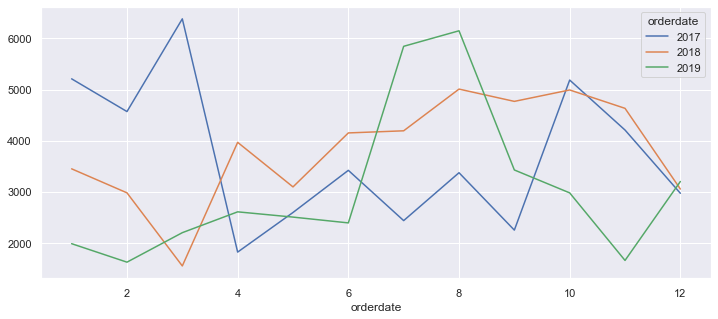

In [402]:
(df
#^ dataframe reference was set to orders while I'm using df
 .groupby([df.orderdate.dt.year, df.orderdate.dt.month])
 .linetotal
#  ^ feature was set to ordval which does not exist, think this was supposed to be linetotal
 .sum()
 .unstack(level=0)
 .plot(figsize=(12, 5))
)

Using Seaborn we can easily turn this into a multi-plot figure (see: https://seaborn.pydata.org/generated/seaborn.relplot.html).
We run however into some problems when we want to get the year and the month from the orderdate and subsequently group on it. Unfortunately, we can't do a mutating group by in pandas, so we first have to create year and month as separate columns. 

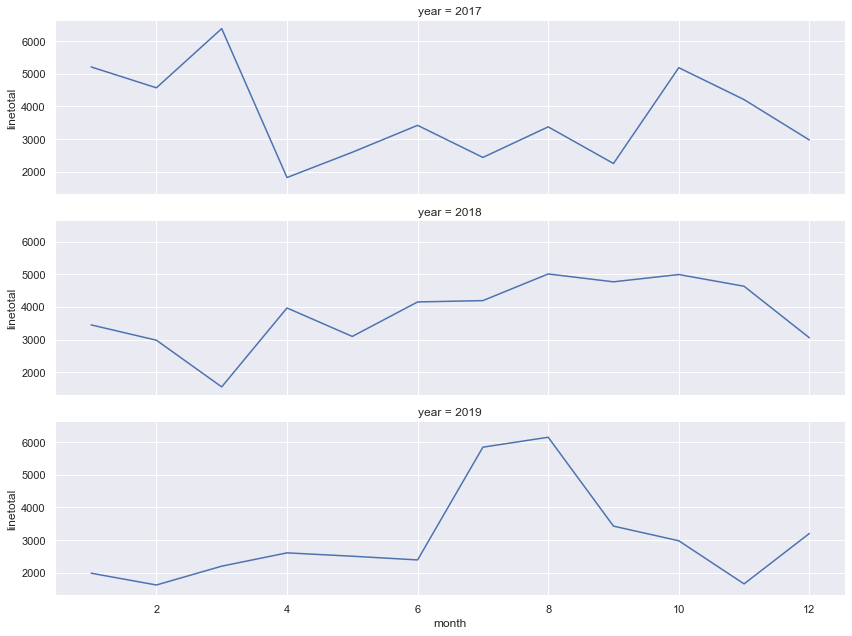

In [403]:
# Note: first assign variables to month and year, in order to use this on the axes of the relplot.
(df
 .assign(year=df.orderdate.dt.year, month=df.orderdate.dt.month)
 .groupby(['year', 'month'], as_index=False)
 .linetotal
 .sum()
 .pipe((sns.relplot, 'data'), kind='line', x='month', y='linetotal', row='year', height=3, aspect=4)
)

Lastly, we want to compare the monthly revenue for each product category by year. You can (re)use most of the previous plot, but now you have to add another variable to group by and add this to the grid to plot both monthly values for each year and category.

You should get a result looking like this:
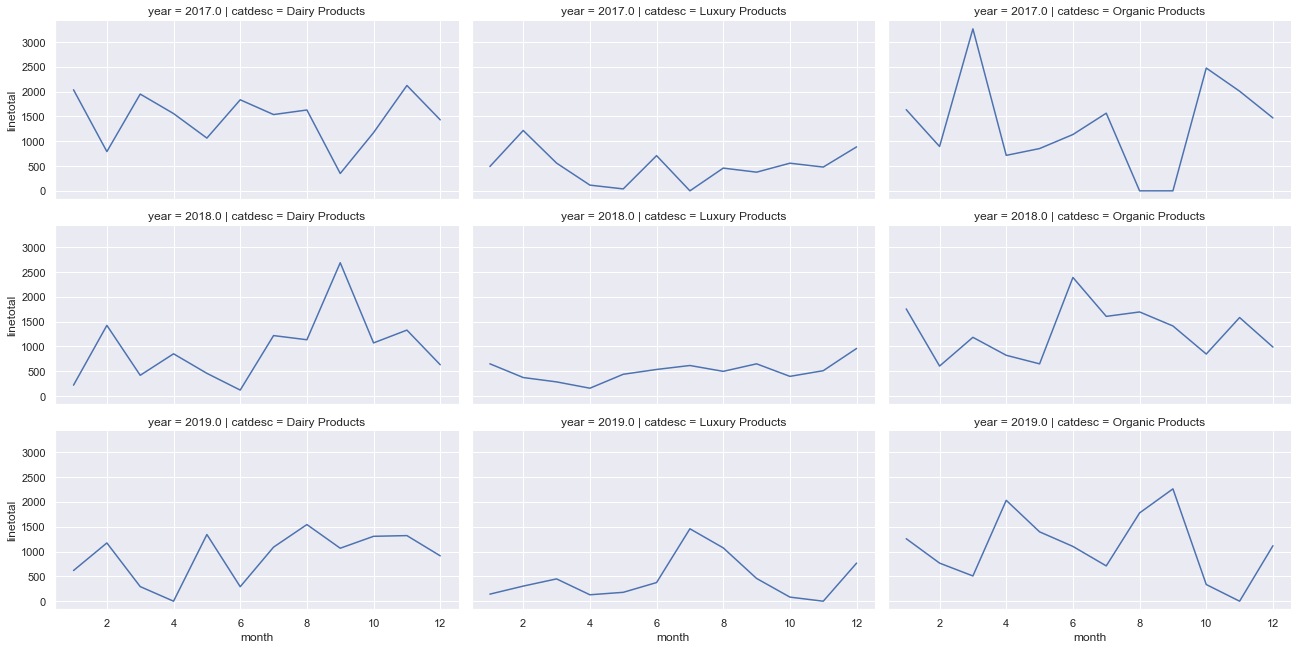

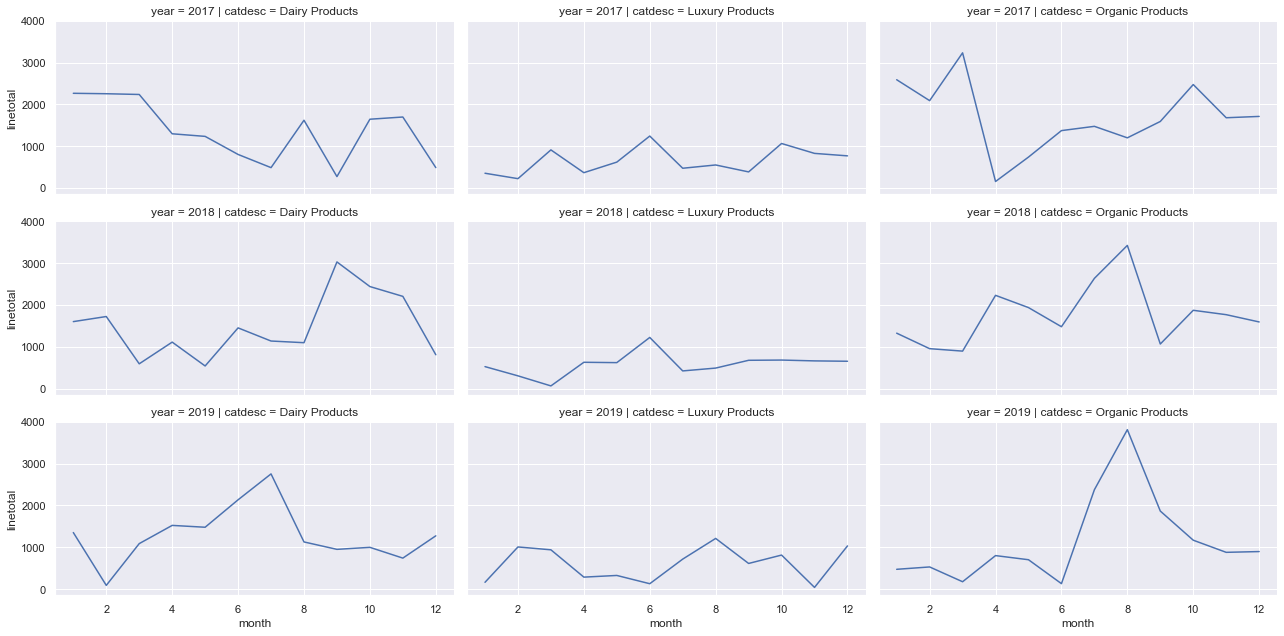

In [413]:
# your code and comments to visualize the data 
(df
 .assign(year=df.orderdate.dt.year, month=df.orderdate.dt.month)
 .groupby(['year', 'month', 'catdesc'], as_index=False)
 .linetotal
 .sum()
 .pipe((sns.relplot, 'data'), kind='line', x='month', y='linetotal', row='year', col='catdesc', height=3, aspect=2)
)
# Seems like that orders dataframe had different values or something compared to mine 
# spent quite a while just figuring out what was written in the above functions seen as it did not run in this notebook